In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
customers = pd.read_csv('Mall_Customers.csv')

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


   * Customer ID = Identificação única de um cliente
   * Gender = Gênero do cliente
   * Age = Idade do consumidor
   * Annual Income = Renda anual do cliente
   * Spending Score = Pontuação atribuida pelo shopping com base no comportamento do cliente e na natureza do gasto

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


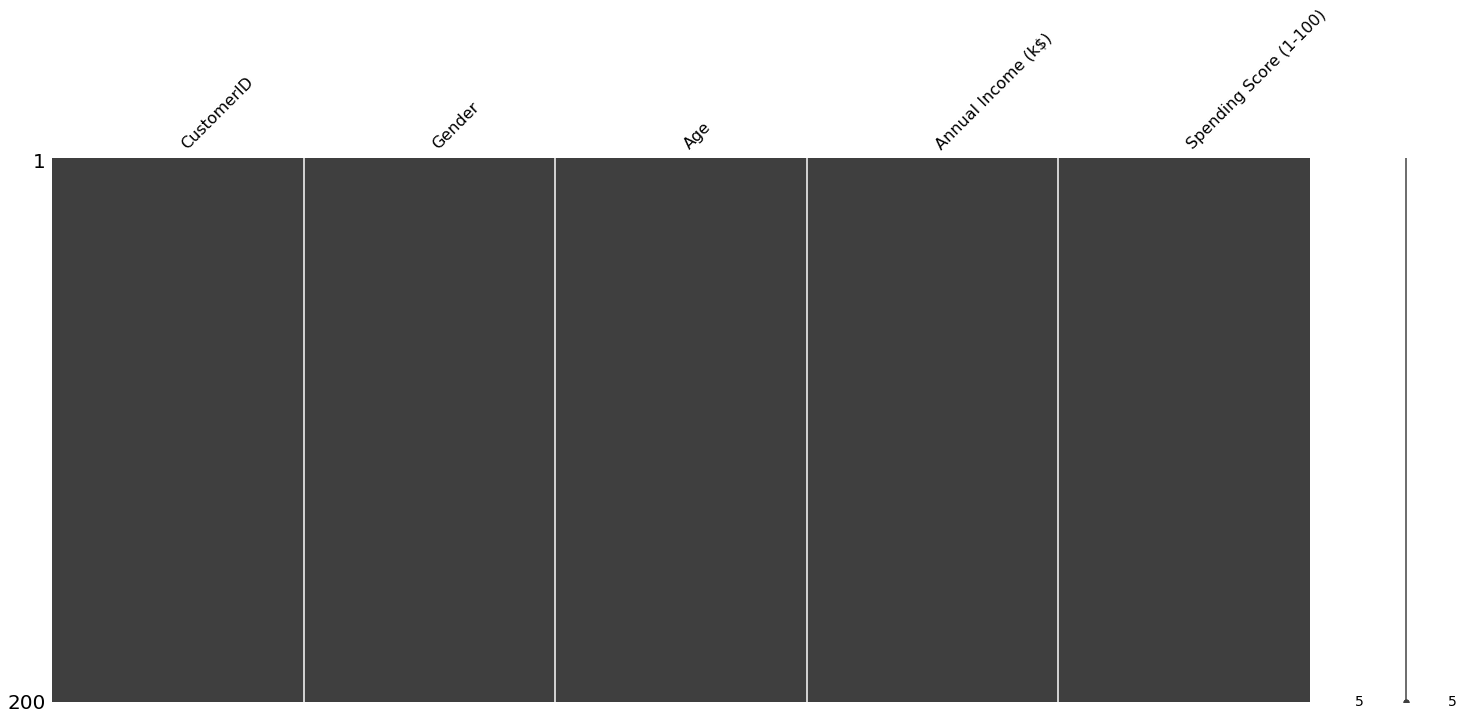

In [5]:
import missingno as msno
msno.matrix(customers)

In [7]:
# Adicionando valores nulos
customers_null = customers
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index, col] = np.nan

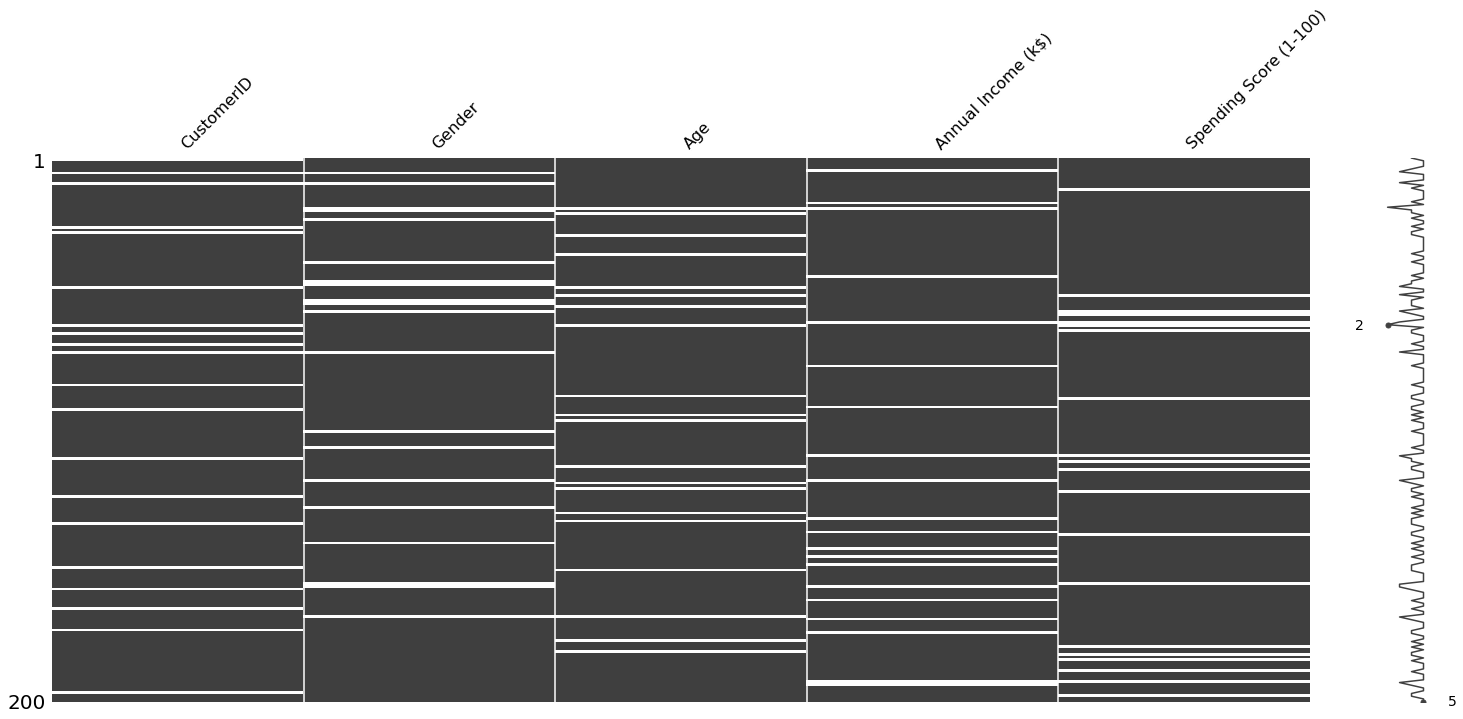

In [8]:
msno.matrix(customers_null)

In [10]:
customers_null.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [11]:
# deletando as linhas que possuem algum valor nulo
customers_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
6,7.0,Female,35.0,18.0,6.0
7,8.0,Female,23.0,18.0,94.0
...,...,...,...,...,...
191,192.0,Female,32.0,103.0,69.0
194,195.0,Female,47.0,120.0,16.0
195,196.0,Female,35.0,120.0,79.0
198,199.0,Male,32.0,137.0,18.0


In [12]:
customers_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,0.0,40.0
...,...,...,...,...,...
195,196.0,Female,35.0,120.0,79.0
196,0.0,Female,45.0,126.0,28.0
197,198.0,Male,32.0,126.0,0.0
198,199.0,Male,32.0,137.0,18.0


In [13]:
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,101.766667,39.205556,59.927778,50.561111
std,57.607039,14.240432,26.191182,25.840976
min,2.000000,18.000000,15.000000,1.000000
25%,51.750000,29.000000,40.000000,34.750000
50%,102.500000,36.000000,60.000000,50.000000
75%,150.500000,49.000000,77.250000,73.000000
max,200.000000,70.000000,137.000000,98.000000


In [14]:
# Preenchendo os valores medios da coluna
customers_null.fillna(customers_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,101.766667,Male,19.0,15.000000,39.000000
1,2.000000,Male,21.0,15.000000,81.000000
2,3.000000,Female,20.0,16.000000,6.000000
3,4.000000,Female,23.0,16.000000,77.000000
4,5.000000,Female,31.0,59.927778,40.000000
...,...,...,...,...,...
195,196.000000,Female,35.0,120.000000,79.000000
196,101.766667,Female,45.0,126.000000,28.000000
197,198.000000,Male,32.0,126.000000,50.561111
198,199.000000,Male,32.0,137.000000,18.000000


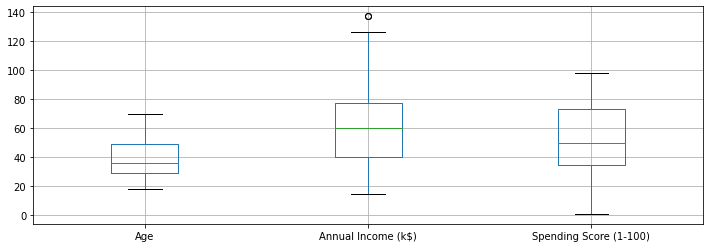

In [17]:
# Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o boxplot.
plt.figure(figsize=(12,4))
customers.boxplot(
    column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [27]:
# Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o Z-score
from scipy import stats
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result = np.where(z > threshold)

df_salario_outlier = customers.iloc[result[0]]

In [28]:
df_salario_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Text(0.5, 1.0, 'Distruibuição dos clientes quanto ao gênero')

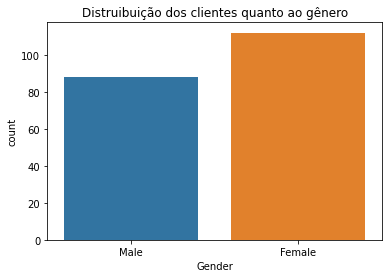

In [30]:
# Explorando os dados. Entendendo alguns relacionamentos e comportamentos dos clientes
sns.countplot(x='Gender', data=customers)
plt.title('Distruibuição dos clientes quanto ao gênero')

  **Aplicando a codificação aos dados**

In [31]:
cat_df_customers = customers.select_dtypes(include=['object']) # copiando as colunas que são do tipo categoricas

In [32]:
cat_df_customers.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


  **Aplicando o Mapeamento**

In [36]:
# define o dicionario a ser utilizado (map)
replace_map = {'Gender': {'Male': 1, 'Female': 2}}
# encontra a lista das variaveis categoricas
labels = cat_df_customers['Gender'].astype(
    'category').cat.categories.tolist()
replace_map_comp = {'Gender': {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}} #define o mapeamento

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [37]:
cat_df_customers_replace = pd.read_csv('Mall_Customers.csv')

In [38]:
cat_df_customers_replace.replace(replace_map_comp, inplace=True)
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


  **Aplicando o Label Encodering**

In [48]:
customers = pd.read_csv('Mall_Customers.csv')

In [49]:
cat_df_customers_lc=customers

In [50]:
cat_df_customers_lc['Gender'] = pd.Categorical(cat_df_customers_lc['Gender'])

In [51]:
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [52]:
cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes

In [53]:
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()

In [56]:
customers_label = pd.read_csv('Mall_Customers.csv')
customers_label['Gender'] = le.fit_transform(customers_label['Gender'])
customers_label.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**One hot Enconding**

In [58]:
customers_one_hot = pd.read_csv('Mall_Customers.csv')
customers_one_hot = pd.get_dummies(customers_one_hot)
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [59]:
customers = pd.read_csv('Mall_Customers.csv')

In [60]:
customers_one_hot=customers
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [62]:
customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray()
customers_ohe.shape

(200, 2)

In [63]:
customers_ohe

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.